<h1>Runge-Kutta 4 Method (RK4)</h1>
<p>Similar to the RK2 method, we recursively apply Euler's method. This time we will end up with a little bir different coefficients in the end, however the idea is the same. As a reminder;
    $$x(t+h) = x(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$ where $$k_1 = hf(t,x(n))$$, 
    $$ k_2 = sf(t+\frac{h}{2}, x_n + \frac{k_1}{2})$$
    $$ k_3 = sf(t+\frac{h}{2}, x_n + \frac{k_2}{2})$$
    $$ k_4 = sf(t+\frac{h}{2}, x_n +k_3) $$
</p>

<h2>A Simple Example:</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

global num_steps
num_steps = 5000
h = 0.02

Text(0.5, 1.0, 'Stepsize, $N$ = 5000')

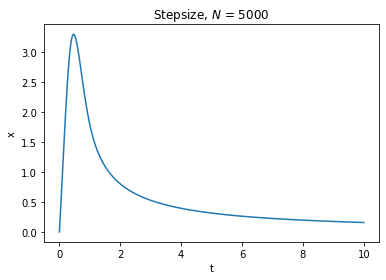

In [3]:
x = np.zeros(num_steps) ## Runge-Kutta
t = np.linspace(0,10,num_steps)

def g(x,t):
    return np.cos(x*t)

for n in range(0,num_steps-1):
    k_1 = h*g(x[n], t[n])
    k_2 = h*g(x[n]+k_1/2,t[n]+(h/2)) 
    k_3 = h*g(x[n]+k_2/2, t[n]+(h/2)) 
    k_4 = h*g(x[n]+k_3, t[n]+h)
    x[n+1] = x[n] + k_1/6 + k_2/3 + k_3/3 + k_4/6
    
plt.plot(t,x,label='4th order Runge-Kutta')
plt.ylabel('x')
plt.xlabel('t')
plt.title(f'Stepsize, $N$ = %i' % num_steps)


<h1>Verlet Method</h1>
<p>In classical physics we usually have the equations of motion in the form:
    $$F(x(t),t) = m \frac{d^2x(t)}{dt^2}$$ with the initial conditions $x(0) = v(0) = 0$
    If we take the mass on the other side and define the acceleration:
    $$ \ddot{x} = a(x(t),t)$$
</p>
<p>When we apply the discrete derivative definition twice, namely:
    $$\ddot{x} = \dot{v} = \frac{v(t+\frac{h}{2})-v(t-\frac{h}{2})}{h}$$
   We apply once again on the velocities the same process:
   $$\ddot{x} = \dot{v} = \frac{\frac{x(t+h)-x(t)}{h}-\frac{x(t)-x(t-h)}{h}}{h}$$ 
</p>
<p>Or in more compact form:
    $$ x[n+1] = 2x[n] - x[n-1] + h^2a(x[n],t[n])$$ written in the format of implementation.
</p>
<p>We can see here that at $n=0$ this has no meaning. Then for the initial case, we use Taylor expansion and write:
    $$ x[1] = x[0] + hv[0] + \frac{h^2}{2}a(x[0],t[0])$$
</p>

<h3>If we have v dependence:</h3>
<p>The cases with v dependence, we write the above formula a bit different in the form:
     $$ x[n+1] = 2x[n] - x[n-1] + h^2a(x[n],v[n],t[n])$$ 
     $$ x[1] = x[0] + hv[0] + \frac{h^2}{2}a(x[0],v[0],t[0])$$ where
     $$ v[n] = \frac{x[n+1]-x[n-1]}{2h}$$
</p>

<h2>Simple Harmonic Oscillator Example</h2>
<p>The case of simple harmonic oscillator as usualy will be a rather easy example to check if the method works.
Simply we can code the method almost directly. </p>

In [4]:
def harmonic_oscillator_verlet(k=0.5,m=1):
    
    # Let's start by defining our variables in a discrete manner
    t = np.linspace(0, num_steps*h, num_steps+1)
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)
    
    # Initial conditions
    x[0] = 1
    v[0] = 0
    
    # The Verlet Step
    for n in np.arange(num_steps):
        if n==0:
            # First Verlet step
            x[1] = x[0] + h * v[0] + (h**2/2)*(-k/m)*x[0]
        else:
            x[n+1] = 2*x[n] - x[n-1] + (h**2)*(-k/m)*x[n]

    # Plotting the result and comparing with the exact solution
    fig = plt.figure()
    line_1, line_2 = plt.plot(t, x, 'b-', t, x[0]*np.cos(np.sqrt(k/m)*t), 'r--')
    fig.legend((line_1, line_2), ('numerical', 'exact'), 'upper left')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    return t,x




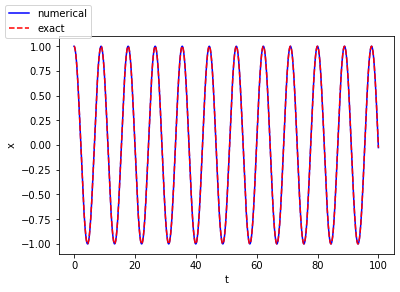

In [5]:
t,x= harmonic_oscillator_verlet()

<p>We can see that the result fits with the analytical solution.</p>

<h2>Damped Harmonic Oscillator Example</h2>
<p>We consider the simplest form of a damped oscillator. Let's remember that the damped harmonic oscillator is governed by the equation:
    $$a\ddot{x}+b\dot{x}+cx = 0$$
For simplicity let's consider the case where all the parameters are $1$. Then we have;
    $$\ddot{x} = -\dot{x} - x$$
This has velocity dependence and if we follow the method above:
     $$ x[n+1] = 2x[n] - x[n-1] + h^2\ddot{x}(x[n],v[n],t[n])$$ 
     $$ x[n+1] = 2x[n] - x[n-1] + h^2 (-\dot{x}-x)$$
We substitude for $\dot{x} = \frac{x[n+1]-x[n-1]}{2h}$ and solve for $x[n+1]$. This will give us the final result. Namely;
    $$ x[n+1] = 2x[n] - x[n-1] + h^2 (\frac{-x[n+1]}{2h} + \frac{x[n-1]}{2h} -x)$$ 
    $$ x[n+1] + \frac{hx[n+1]}{2} = 2x[n] - x[n-1] + \frac{h}{2}x[n-1] - h^2x[n]$$ And finaly;
    $$ x[n+1] = \frac{2}{2+h}\big(2x[n] -x[n-1] + \frac{h}{2}x[n-1] - h^2x[n]\big)$$

</p>
<p>If we apply this method, we will have the solution to the damped oscillator.</p>

In [7]:
def damped_harmonic_oscillator_verlet():


    # Let's start by defining our variables in a discrete manner
    t = np.linspace(0, num_steps*h, num_steps+1)
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)
    
    # Initial conditions
    x[0] = 1
    v[0] = 0
    
    # The Verlet Step
    for n in np.arange(num_steps):
        if n==0:
            # First Verlet step
            x[1] = x[0] + h * v[0] + (h**2/2)*(-v[0] - x[0])
        else:
            x[n+1] = (2/(2+h)) * (2*x[n] - x[n-1] - h**2 * x[n] + (h/2)*x[n-1])

    # Plotting the result and comparing with the exact solution
    plt.plot(t,x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    return t,x


<p>Below we can see that because of the lack of our parameters, we have a very quickly damping visual. But we can definitely see that this is as expected, a damping oscillator behaviour. But this was also a model that we could've solved analytically. Let us go on to a more complicated system.</p>

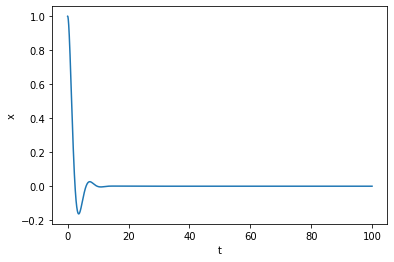

In [8]:
t, x = damped_harmonic_oscillator_verlet()